In [131]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import sklearn

# Предсказать какой отель был забронирован, городской или курортный, оценивая исходные данные по различным параметрам.

#### Загружаем данные:

In [132]:
url = "https://raw.githubusercontent.com/Sergo567/Machine-learning/master/hotel_booking.csv"
data = pd.read_csv(url)

In [133]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


#### Вывод имеющихся признаков:

In [134]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [135]:
data.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390,119390,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,3,926,81503,115889,119390,9000
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,Transient,NaN,NaN,NaN,Check-Out,2015-10-21,Robert Smith,Michael.C@gmail.com,864-922-2599,************4923
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,89613,NaN,NaN,NaN,75166,1461,48,6,1,28
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,101.831122,0.062518,0.571363,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,50.535790,0.245291,0.792798,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,-6.380000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,69.290000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,94.575000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,126.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
data.index

RangeIndex(start=0, stop=119390, step=1)

In [137]:
data['hotel'] = data['hotel'].astype('category')
data['arrival_date_month'] = data['arrival_date_month'].astype('category')
data['meal'] = data['meal'].astype('category')
data['country'] = data['country'].astype('category')
data['market_segment'] = data['market_segment'].astype('category')
data['distribution_channel'] = data['distribution_channel'].astype('category')
data['reserved_room_type'] = data['reserved_room_type'].astype('category')
data['assigned_room_type'] = data['assigned_room_type'].astype('category')
data['deposit_type'] = data['deposit_type'].astype('category')
data['customer_type'] = data['customer_type'].astype('category')
data['reservation_status'] = data['reservation_status'].astype('category')

data.describe(include = 'all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390,119390,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,3,926,81503,115889,119390,9000
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,Transient,NaN,NaN,NaN,Check-Out,2015-10-21,Robert Smith,Michael.C@gmail.com,864-922-2599,************4923
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,89613,NaN,NaN,NaN,75166,1461,48,6,1,28
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,101.831122,0.062518,0.571363,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,50.535790,0.245291,0.792798,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,-6.380000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,69.290000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,94.575000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,126.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


#### Найдем матрицу корреляции:

In [138]:
corr_mat = data.corr()
corr_mat

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,-0.084793,0.110133,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,-0.124410,0.086042,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,0.010341,-0.119822,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,-0.030131,0.035501,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,-0.006145,-0.027011,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,-0.087239,-0.012775,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,-0.097245,-0.013992,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,-0.146426,-0.006738,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,-0.032859,-0.024730,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,-0.008943,-0.007501,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889


#### Как визуально выглядит эта матрица:

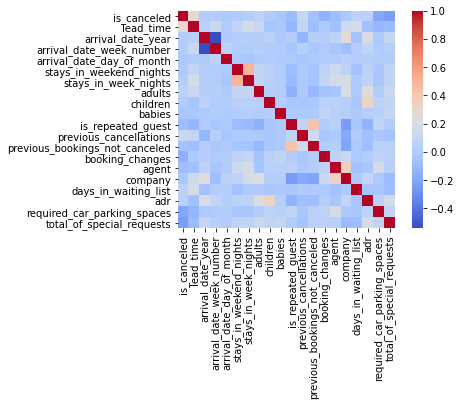

In [139]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Как можно заметить, наиболее коррелирующие между собой признаки stays_in_weekend_nights и stays_in_week_nights, а также agent и company.

In [140]:
data['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

#### Покажем несбалансированность классов на диаграмме и в процентном соотношении:

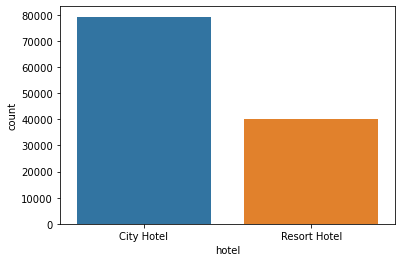

In [141]:
sns.countplot(x='hotel', data=data)
pass

In [142]:
data['hotel'].value_counts() / data['hotel'].value_counts().sum()*100

City Hotel      66.446101
Resort Hotel    33.553899
Name: hotel, dtype: float64

#### Построим все возможные диаграммы рассеивания для каждой пары признаков:

In [143]:
##np.random.seed(42)
##random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
##sns.pairplot(data.iloc[random_subset], hue='hotel', diag_kind='hist')
##pass

#### Заполняем пропущенные значения:

In [144]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [145]:
data.fillna(data.median(axis = 0), axis=0 , inplace=True)
data.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [146]:
data['children'].fillna(data['children'].mode().iloc[0], inplace=True)
data['country'].fillna(data['country'].mode().iloc[0], inplace=True)
data['agent'].fillna(data['agent'].mode().iloc[0], inplace=True)
data['company'].fillna(data['company'].mode().iloc[0], inplace=True)
data.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [147]:
arrival_date_month_dummies = pd.get_dummies(data['arrival_date_month'])
meal_dummies = pd.get_dummies(data['meal'])
country_dummies = pd.get_dummies(data['country'])
market_segment_dummies = pd.get_dummies(data['market_segment'])
distribution_channel_dummies = pd.get_dummies(data['distribution_channel'])
reserved_room_type_dummies = pd.get_dummies(data['reserved_room_type'])
assigned_room_type_dummies = pd.get_dummies(data['assigned_room_type'])
deposit_type_dummies = pd.get_dummies(data['deposit_type'])
customer_type_dummies = pd.get_dummies(data['customer_type'])
reservation_status_dummies = pd.get_dummies(data['reservation_status'])
hotel_dummies = pd.get_dummies(data['hotel'])

data = pd.concat((data, arrival_date_month_dummies), axis=1)
data = pd.concat((data, meal_dummies), axis=1)
data = pd.concat((data, country_dummies), axis=1)
data = pd.concat((data, market_segment_dummies), axis=1)
data = pd.concat((data, distribution_channel_dummies), axis=1)
data = pd.concat((data, reserved_room_type_dummies), axis=1)
data = pd.concat((data, assigned_room_type_dummies), axis=1)
data = pd.concat((data, deposit_type_dummies), axis=1)
data = pd.concat((data, customer_type_dummies), axis=1)
data = pd.concat((data, reservation_status_dummies), axis=1)
data = pd.concat((data, hotel_dummies), axis=1)

y = data['hotel']

data = data.drop(['arrival_date_month'], axis=1)
data = data.drop(['meal'], axis=1)
data = data.drop(['country'], axis=1)
data = data.drop(['market_segment'], axis=1)
data = data.drop(['distribution_channel'], axis=1)
data = data.drop(['reserved_room_type'], axis=1)
data = data.drop(['assigned_room_type'], axis=1)
data = data.drop(['deposit_type'], axis=1)
data = data.drop(['customer_type'], axis=1)
data = data.drop(['reservation_status'], axis=1)
data = data.drop(['hotel'], axis=1)


data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,Refundable,Contract,Group,Transient,Transient-Party,Canceled,Check-Out,No-Show,City Hotel,Resort Hotel
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,1,0,0,1
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,1,0,0,1


#### Уберем повторяющиеся столбцы и нормализуем наши данные:

In [ ]:
data = data.loc[:,~data.columns.duplicated()]
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)
data_stand.describe()